In [93]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import csv

In [94]:
def get_labels(csvfile):
    with open(csvfile) as f:
        reader = csv.reader(f, delimiter=',')
        # get the first line in csv
        labels = reader.__next__()
        # return just the letters from pos 1 on
        return labels[1:]
                            
def make_label_dict(labels):
    l = {}
    for i, label in enumerate(labels):
        l[i] = label
    return l

In [95]:
data = np.genfromtxt('CIELNET.csv', delimiter=',')

In [96]:
adjacency = data[1:,1:]


In [97]:
rows, cols = np.where(adjacency == 1)
edges = zip(rows.tolist(), cols.tolist())
G = nx.Graph()
all_rows = range(0, adjacency.shape[0])
for n in all_rows:
    G.add_node(n)
G.add_edges_from(edges)

In [98]:
labels= make_label_dict(get_labels('CIELNET.csv'))
#labels= get_labels('CIELNET.csv')

In [99]:
def plot_directed_graph_spiral(G):
    pos = nx.spiral_layout(G)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()

In [100]:
def plot_directed_graph_spring(G):
    pos = nx.spring_layout(G, k=3)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()

In [101]:
def plot_directed_graph_spring(G):
    pos = nx.spring_layout(G, k=3)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()

In [102]:
def plot_directed_graph_spectral(G):
    pos = nx.spectral_layout(G)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()

In [103]:
def plot_directed_graph_shell(G):
    pos = nx.shell_layout(G)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()

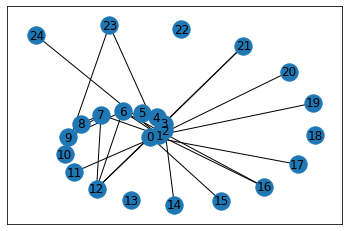

In [104]:
plot_directed_graph_spiral(G)

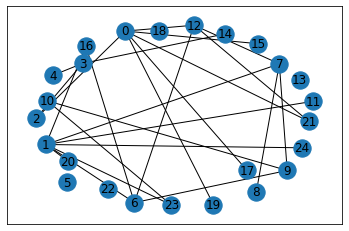

In [105]:
plot_directed_graph_spring(G)

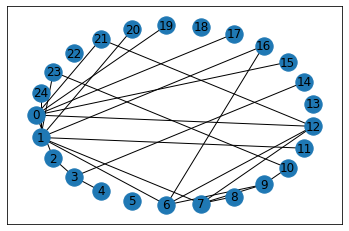

<Figure size 432x288 with 0 Axes>

In [106]:
plot_directed_graph_shell(G)
plt.savefig('PartCshell_layout.png')

In [107]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.hist(degrees)
    

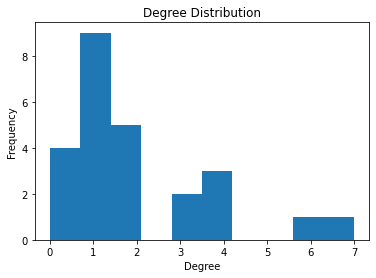

In [108]:
plot_degree_dist(G)
plt.savefig('Q3_degree_distribution.png')


In [109]:
degree_freq = nx.degree_histogram(G)

G_deg_sum = [a * b for a, b in zip(degree_freq, range(0, len(degree_freq)))]
total_degree = sum(G_deg_sum)

avg_k = sum(G_deg_sum) / G.number_of_nodes()
print(avg_k)

2.0


In [110]:
def voter_model(G, initial_red_fraction=0.9, max_steps=11000):
    
    #set up initial conditions
    colors = ['red' if np.random.rand() < initial_red_fraction else 'blue' for _ in G.nodes()]
    nx.set_node_attributes(G, {i: colors[i] for i in G.nodes()}, 'color')
    
    #for each time step until we reach max
    for t in range(max_steps):
        
        #choose a random node
        node = np.random.choice(G.nodes())
        
        #generate list of that node's neighbors
        neighbors = list(G.neighbors(node))
        
        #If the randomly selected node has neighbors
        if len(neighbors) > 0:
        
            #choose one of the neighbors at random
            neighbor_x = np.random.choice(neighbors)
        
            #change color of original node to match randomly selected neighbor
            G.nodes[node]['color'] = G.nodes[neighbor_x]['color']
        
        if len(set(nx.get_node_attributes(G, 'color').values())) == 1:
            return t
    return max_steps

In [111]:
runs = 100
times = [voter_model(G) for _ in range(runs)]
average_time = np.mean(times)
print(f"Average time to reach consensus over {runs} runs: {average_time}")



Average time to reach consensus over 100 runs: 3890.32


In [112]:
#creating config model for 4B

deg_sequence= []


for g in G.degree:
    deg_sequence.append(g[1])

In [113]:
G_rand= nx.configuration_model(deg_sequence, create_using=None, seed=None)

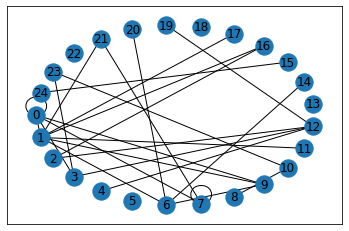

In [114]:
plot_directed_graph_shell(G_rand)

In [115]:
runs = 300
times = [voter_model(G_rand) for _ in range(runs)]
average_time = np.mean(times)
print(f"Average time to reach consensus over {runs} runs: {average_time}")




Average time to reach consensus over 300 runs: 5088.233333333334
